In [6]:
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from numpy.polynomial.polynomial import polyfit
from scipy import signal
from scipy.stats import norm

import matplotlib

import matplotlib.pyplot as plt
import netCDF4 as nc
from matplotlib import pyplot
from matplotlib import colors as mcolors
import matplotlib.gridspec as gridspec
from scipy.stats import norm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import gcm_filters

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [7]:
def compute_spectrum(KE_spectre):
    dx=1/(dx_min/1000)
    print(dx_min)
    no=0
    ff_KE_spectre=np.zeros(KE_spectre.shape)
    ff_KE_spectreki0=np.zeros(KE_spectre.shape)
    # len(KE_spectre_20[:,0])
    for j in range(len(KE_spectre[0,:])):
        ff_KE_spectre[:,j], ff_KE_spectreki0[:,j]= signal.welch(KE_spectre[:,j], fs=dx,nperseg=int(len(KE_spectre[:,0])), window='hanning', noverlap=no,nfft=2*int(len(KE_spectre[:,0])-1),  detrend='linear', return_onesided=True, scaling='spectrum')

    mean_f0_KE_spectre = np.nanmean(ff_KE_spectre,axis=1)
    mean_fi0_KE_spectre = np.nanmean(ff_KE_spectreki0,axis=1)
    return mean_f0_KE_spectre, mean_fi0_KE_spectre

In [8]:
Coordfile = xr.open_dataset('/data/vdi/tbrivoal/PRE_PROCESSING_IMMERSE/BATHY/DOMAINcfgs/domain_cfg_init.nc', drop_variables={"x", "y",})
DSTART = '2017-02-01'
DEND = '2018-02-01'

Ufile_AGRIF = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/eNEATL36_1d_gridU.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))
Vfile_AGRIF = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/eNEATL36_1d_gridV.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))

Ufile_AGRIF_36 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/gridU_filt36.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))
Vfile_AGRIF_36 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/gridV_filt36.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))

Ufile_AGRIF_20 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/gridU_filt20.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))
Vfile_AGRIF_20 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/gridV_filt20.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))

Ufile_AGRIF_8 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/gridU_filt8.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))
Vfile_AGRIF_8 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/gridV_filt8.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))


###################


Ufile_TWIN = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/eNEATL36_1d_gridU.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))
Vfile_TWIN = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/eNEATL36_1d_gridV.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))

Ufile_TWIN_36 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/gridU_filt36.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))
Vfile_TWIN_36 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/gridV_filt36.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))

Ufile_TWIN_20 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/gridU_filt20.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))
Vfile_TWIN_20 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/gridV_filt20.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))

Ufile_TWIN_8 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/gridU_filt8.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))
Vfile_TWIN_8 = xr.open_dataset('/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_TRUE/gridV_filt8.nc', chunks={'time_counter': 50}).sel(time_counter=slice(DSTART, DEND))


In [9]:
# del(Ufile_TWIN , Vfile_TWIN )

In [10]:
Ufile_TWIN

<xarray.Dataset>
Dimensions:            (depthu: 1, bnds: 2, y: 1894, x: 1294, time_counter: 366)
Coordinates:
  * depthu             (depthu) float32 0.494
    nav_lat            (y, x) float32 dask.array<chunksize=(1894, 1294), meta=np.ndarray>
    nav_lon            (y, x) float32 dask.array<chunksize=(1894, 1294), meta=np.ndarray>
  * time_counter       (time_counter) datetime64[ns] 2017-02-01 ... 2018-02-01
Dimensions without coordinates: bnds, y, x
Data variables:
    depthu_bnds        (depthu, bnds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bnds  (time_counter, bnds) datetime64[ns] dask.array<chunksize=(23, 2), meta=np.ndarray>
    vozocrtx           (time_counter, depthu, y, x) float32 dask.array<chunksize=(23, 1, 1894, 1294), meta=np.ndarray>
Attributes: (12/17)
    CDI:            Climate Data Interface version 1.9.3 (http://mpimet.mpg.d...
    history:        Wed May  4 12:52:29 2022: ncks -3 eNEATL36_1d_gridU.nc eN...
    _NCProperties:  version=2,netcdf=4.7.1,hdf5=1.8.18,
    Conventions:    CF-1.6
    name:           eNEATL36_1d_gridU25h
    description:    ocean U grid variables
    ...             ...
    jbegin:         0
    nj:             19
    file_name:      eNEATL36_1d_gridU25h_20170104-20170104.nc
    TimeStamp:      02/05/2022 09:35:56 -0000
    CDO:            Climate Data Operators version 1.9.3 (http://mpimet.mpg.d...
    NCO:            4.4.7

In [11]:
time=Ufile_AGRIF.time_counter
time

<xarray.DataArray 'time_counter' (time_counter: 366)>
array(['2017-02-01T00:00:00.000000000', '2017-02-02T00:00:00.000000000',
       '2017-02-03T00:00:00.000000000', ..., '2018-01-30T00:00:00.000000000',
       '2018-01-31T00:00:00.000000000', '2018-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2017-02-01 ... 2018-02-01
Attributes:
    standard_name:  time
    long_name:      Time axis
    bounds:         time_counter_bnds
    axis:           T

In [12]:
dxe = Coordfile.e1t.squeeze()
dye = Coordfile.e2t.squeeze()
dxn = Coordfile.e1v.squeeze()
dyn = Coordfile.e2v.squeeze()
dx_min = 3000 #min(dxe.min(),dye.min(),dxn.min(),dyn.min())
lon=Coordfile.glamt.squeeze()
lat=Coordfile.gphit.squeeze()
bathy=Coordfile.bathy_metry.squeeze()


In [13]:
U_AGRIF = Ufile_AGRIF.vozocrtx.squeeze().values
V_AGRIF = Vfile_AGRIF.vomecrty.squeeze().values
KE_AGRIF = 0.5 * ( U_AGRIF**2 + V_AGRIF **2)*100 *100



In [14]:

U_AGRIF_8 = Ufile_AGRIF_8.vozocrtx_filt8.squeeze().values
V_AGRIF_8 = Vfile_AGRIF_8.vomecrty_filt8.squeeze().values

KE_AGRIF_8 = 0.5 * ( U_AGRIF_8**2 + V_AGRIF_8 **2)*100 *100


In [16]:
U_AGRIF_8 = Ufile_AGRIF_8.vozocrtx_filt8.squeeze().values
V_AGRIF_8 = Vfile_AGRIF_8.vomecrty_filt8.squeeze().values

U_AGRIF_20 = Ufile_AGRIF_20.vozocrtx_filt20.squeeze().values
V_AGRIF_20 = Vfile_AGRIF_20.vomecrty_filt20.squeeze().values

U_AGRIF_36 = Ufile_AGRIF_36.vozocrtx_filt36.squeeze().values
V_AGRIF_36 = Vfile_AGRIF_36.vomecrty_filt36.squeeze().values

KE_AGRIF_8 = 0.5 * ( U_AGRIF_8**2 + V_AGRIF_8 **2)*100 *100

KE_AGRIF_20 = 0.5 * ( U_AGRIF_20**2 + V_AGRIF_20 **2)*100 *100
KE_AGRIF_36 = 0.5 * ( U_AGRIF_36**2 + V_AGRIF_36 **2)*100 *100

#

U_AGRIF_abv_36 =  U_AGRIF - U_AGRIF_36
V_AGRIF_abv_36 =  V_AGRIF - V_AGRIF_36

U_AGRIF_20_36 =  U_AGRIF_36 - U_AGRIF_20
V_AGRIF_20_36 =  V_AGRIF_36 - V_AGRIF_20

U_AGRIF_8_20 =  U_AGRIF_20 - U_AGRIF_8
V_AGRIF_8_20 =  V_AGRIF_20 - V_AGRIF_8

KE_AGRIF_abv_36 = 0.5 * ( U_AGRIF_abv_36**2 + V_AGRIF_abv_36**2) *100*100
KE_AGRIF_20_36 = 0.5 * ( U_AGRIF_20_36**2 + V_AGRIF_20_36**2) *100*100
KE_AGRIF_8_20 = 0.5 * ( U_AGRIF_8_20**2 + V_AGRIF_8_20**2) *100*100



In [17]:
del(U_AGRIF_20, V_AGRIF_20, U_AGRIF_36, V_AGRIF_36, U_AGRIF, V_AGRIF,
    U_AGRIF_8, V_AGRIF_8,U_AGRIF_8_20, V_AGRIF_8_20,U_AGRIF_20_36, V_AGRIF_20_36,
    U_AGRIF_abv_36, V_AGRIF_abv_36)

In [18]:

U_TWIN = Ufile_TWIN.vozocrtx.squeeze().values
V_TWIN = Vfile_TWIN.vomecrty.squeeze().values
KE_TWIN = 0.5 * ( U_TWIN**2 + V_TWIN **2)*100 *100


In [19]:
U_TWIN_8 = Ufile_TWIN_8.vozocrtx_filt8.squeeze().values
V_TWIN_8 = Vfile_TWIN_8.vomecrty_filt8.squeeze().values

U_TWIN_20 = Ufile_TWIN_20.vozocrtx_filt20.squeeze().values
V_TWIN_20 = Vfile_TWIN_20.vomecrty_filt20.squeeze().values

U_TWIN_36 = Ufile_TWIN_36.vozocrtx_filt36.squeeze().values
V_TWIN_36 = Vfile_TWIN_36.vomecrty_filt36.squeeze().values


KE_TWIN_8 = 0.5 * ( U_TWIN_8**2 + V_TWIN_8 **2)*100 *100
KE_TWIN_20 = 0.5 * ( U_TWIN_20**2 + V_TWIN_20 **2)*100 *100
KE_TWIN_36 = 0.5 * ( U_TWIN_36**2 + V_TWIN_36 **2)*100 *100

#

U_TWIN_abv_36 =  U_TWIN - U_TWIN_36
V_TWIN_abv_36 =  V_TWIN - V_TWIN_36

U_TWIN_20_36 =  U_TWIN_36 - U_TWIN_20
V_TWIN_20_36 =  V_TWIN_36 - V_TWIN_20

U_TWIN_8_20 =  U_TWIN_20 - U_TWIN_8
V_TWIN_8_20 =  V_TWIN_20 - V_TWIN_8

KE_TWIN_abv_36 = 0.5 * ( U_TWIN_abv_36**2 + V_TWIN_abv_36**2) *100*100
KE_TWIN_20_36 = 0.5 * ( U_TWIN_20_36**2 + V_TWIN_20_36**2) *100*100
KE_TWIN_8_20 = 0.5 * ( U_TWIN_8_20**2 + V_TWIN_8_20**2) *100*100



RuntimeError: NetCDF: HDF error

In [ ]:
del(U_TWIN_20, V_TWIN_20, U_TWIN_36, V_TWIN_36, U_TWIN, V_TWIN,
    U_TWIN_8, V_TWIN_8,U_TWIN_8_20, V_TWIN_8_20,U_TWIN_20_36, V_TWIN_20_36,
    U_TWIN_abv_36, V_TWIN_abv_36)

In [ ]:
var=np.nanmean(U_AGRIF_20_36,axis=(1,2))
plt.plot(np.arange(0,len(var)),var)

In [ ]:
plt.imshow(V_AGRIF_20_36[-100,:,:],vmin=-0.5,vmax=0.5,cmap='seismic')

In [16]:
IMIN=220
IMAX=1073
JMIN=350
JMAX=1245


imin_IBI_AGRIF=IMIN
imax_IBI_AGRIF=IMAX
jmin_IBI_AGRIF=JMIN
jmax_IBI_AGRIF=JMAX

KE_AGRIF_zoom=KE_AGRIF.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
KE_TWIN_zoom=KE_TWIN.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]

KE_AGRIF_36_zoom=KE_AGRIF_36.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
KE_TWIN_36_zoom=KE_TWIN_36.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]

KE_AGRIF_8_zoom=KE_AGRIF_8.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
KE_TWIN_8_zoom=KE_TWIN_8.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]

KE_AGRIF_20_zoom=KE_AGRIF_20.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
KE_TWIN_20_zoom=KE_TWIN_20.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]

KE_AGRIF_abv_36_zoom=KE_AGRIF_abv_36.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
KE_TWIN_abv_36_zoom=KE_TWIN_abv_36.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]

KE_AGRIF_20_36_zoom=KE_AGRIF_20_36.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
KE_TWIN_20_36_zoom=KE_TWIN_20_36.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]

KE_AGRIF_8_20_zoom=KE_AGRIF_8_20.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
KE_TWIN_8_20_zoom=KE_TWIN_8_20.squeeze()[:,jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]

lon_zoom=lon[jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
lat_zoom=lat[jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]
bathy_zoom=bathy[jmin_IBI_AGRIF:jmax_IBI_AGRIF,imin_IBI_AGRIF:imax_IBI_AGRIF]



In [17]:



KE_AGRIF_zoom_plateau=np.where(bathy_zoom.values < 300,KE_AGRIF_zoom, np.nan)
KE_TWIN_zoom_plateau=np.where(bathy_zoom.values < 300,KE_TWIN_zoom, np.nan)

KE_AGRIF_20_zoom_plateau=np.where(bathy_zoom.values < 300,KE_AGRIF_20_zoom, np.nan)
KE_TWIN_20_zoom_plateau=np.where(bathy_zoom.values < 300,KE_TWIN_20_zoom, np.nan)

KE_AGRIF_8_zoom_plateau=np.where(bathy_zoom.values < 300,KE_AGRIF_8_zoom, np.nan)
KE_TWIN_8_zoom_plateau=np.where(bathy_zoom.values < 300,KE_TWIN_8_zoom, np.nan)


KE_AGRIF_8_20_zoom_plateau=np.where(bathy_zoom.values < 300,KE_AGRIF_8_20_zoom, np.nan)
KE_TWIN_8_20_zoom_plateau=np.where(bathy_zoom.values < 300,KE_TWIN_8_20_zoom, np.nan)

KE_AGRIF_abv_36_zoom_plateau=np.where(bathy_zoom.values < 300,KE_AGRIF_abv_36_zoom, np.nan)
KE_TWIN_abv_36_zoom_plateau=np.where(bathy_zoom.values < 300,KE_TWIN_abv_36_zoom, np.nan)

KE_AGRIF_20_36_zoom_plateau=np.where(bathy_zoom.values < 300,KE_AGRIF_20_36_zoom, np.nan)
KE_TWIN_20_36_zoom_plateau=np.where(bathy_zoom.values < 300,KE_TWIN_20_36_zoom, np.nan)


KE_AGRIF_36_zoom_plateau=np.where(bathy_zoom.values < 300,KE_AGRIF_36_zoom, np.nan)
KE_TWIN_36_zoom_plateau=np.where(bathy_zoom.values < 300,KE_TWIN_36_zoom, np.nan)

In [18]:

x_36_t, y_36_t = {}, {}
x_20_t, y_20_t = {}, {}
x_8_t, y_8_t = {}, {}
x_nofilt_t, y_nofilt_t = {}, {}
randm_ts = [50, 100, 200, 300]
for i in randm_ts:
    print(i)

    U_AGRIF = Ufile_AGRIF.vozocrtx.isel(time_counter=i).squeeze().values
    V_AGRIF = Vfile_AGRIF.vomecrty.isel(time_counter=i).squeeze().values
    U_AGRIF_8 = Ufile_AGRIF_8.vozocrtx_filt8.isel(time_counter=i).squeeze().values
    V_AGRIF_8 = Vfile_AGRIF_8.vomecrty_filt8.isel(time_counter=i).squeeze().values

    U_AGRIF_20 = Ufile_AGRIF_20.vozocrtx_filt12.isel(time_counter=i).squeeze().values
    V_AGRIF_20 = Vfile_AGRIF_20.vomecrty_filt12.isel(time_counter=i).squeeze().values

    U_AGRIF_36 = Ufile_AGRIF_36.vozocrtx_filt36.isel(time_counter=i).squeeze().values
    V_AGRIF_36 = Vfile_AGRIF_36.vomecrty_filt36.isel(time_counter=i).squeeze().values
    
    MODU_AGRIF = np.sqrt(U_AGRIF**2 + V_AGRIF**2)   
    MODU_AGRIF_8 = np.sqrt(U_AGRIF_8**2 + V_AGRIF_8**2)
    MODU_AGRIF_20 = np.sqrt(U_AGRIF_20**2 + V_AGRIF_20**2)
    MODU_AGRIF_36 = np.sqrt(U_AGRIF_36**2 + V_AGRIF_36**2)

    x_36, y_36_tmp = compute_spectrum(np.where(np.isnan(MODU_AGRIF_36.squeeze()),0,MODU_AGRIF_36.squeeze()))
    x_20, y_20_tmp = compute_spectrum(np.where(np.isnan(MODU_AGRIF_20.squeeze()),0,MODU_AGRIF_20.squeeze()))
    x_8, y_8_tmp = compute_spectrum(np.where(np.isnan(MODU_AGRIF_8.squeeze()),0,MODU_AGRIF_8.squeeze()))
    x_nofilt, y_nofilt_tmp = compute_spectrum(np.where(np.isnan(MODU_AGRIF.squeeze()),0,MODU_AGRIF.squeeze()))
    try:
        y_36_t = np.column_stack((y_36_t, y_36_tmp))
        y_20_t = np.column_stack((y_20_t, y_20_tmp))
        y_8_t = np.column_stack((y_8_t, y_8_tmp))
        y_nofilt_t = np.column_stack((y_nofilt_t, y_nofilt_tmp))
        print(y_36_tmp.shape)
    except:
        y_36_t = y_36_tmp
        y_20_t = y_20_tmp
        y_8_t = y_8_tmp
        y_nofilt_t = y_nofilt_tmp   
try:     
    y_36 = np.nanmean(y_36_t,axis=1)
    y_20 = np.nanmean(y_20_t,axis=1)
    y_8 = np.nanmean(y_8_t,axis=1)
    y_nofilt = np.nanmean(y_nofilt_t,axis=1)
except:
    y_36 = y_36_t
    y_20 = y_20_t
    y_8 = y_8_t
    y_nofilt = y_nofilt_t

50
3000
3000
3000
3000
100
3000
3000
3000
3000
(1894,)
200
3000
3000
3000
3000
(1894,)
300
3000
3000
3000
3000
(1894,)


<ipython-input-20-addef2897ba7>:8: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(1/x_36,y_36 , 'b', lw=2, label ='36')
<ipython-input-20-addef2897ba7>:9: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(1/x_20,y_20 , 'r', lw=2, label ='20')
<ipython-input-20-addef2897ba7>:10: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(1/x_8,y_8 , 'g', lw=2, label ='8')
<ipython-input-20-addef2897ba7>:13: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(1/x_nofilt,y_nofilt, 'k', lw=2, label ='nofilter')
<ipython-input-20-addef2897ba7>:41: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0,800)


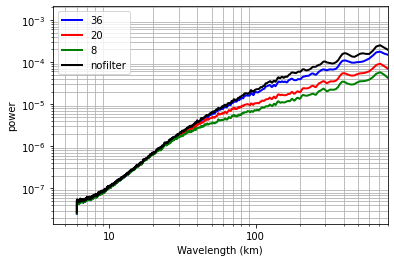

In [20]:
dx=1/(dx_min/1000)
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

wnmin=1/(int(len(KE_AGRIF_36_zoom[100,:,0].squeeze())) * (1/dx))
wnmax=dx
wlmax=(int(len(KE_AGRIF_36_zoom[100,:,0].squeeze())) * (1/dx)) # 1mois #(1/freqmax)/3600
ax = plt.subplot(111)
ax.plot(1/x_36,y_36 , 'b', lw=2, label ='36')
ax.plot(1/x_20,y_20 , 'r', lw=2, label ='20')
ax.plot(1/x_8,y_8 , 'g', lw=2, label ='8')
# ax.plot(1/x_above_36,y_above_36 , 'r', lw=2, label ='above 12',linestyle='--')

ax.plot(1/x_nofilt,y_nofilt, 'k', lw=2, label ='nofilter')


# ax.axvline(
#     36*(1/dx)*1/np.sqrt(2),
#     color="b",
#     linewidth=1,
# )


# ax.axvline(
#     20*(1/dx)*1/np.sqrt(2),
#     color="r",
#     linewidth=1,
# )

# ax.axvline(
#     8*(1/dx)*1/np.sqrt(2),
#     color="g",
#     linewidth=1,
# )



ax.set_yscale('log')

ax.set_xscale('log')
ax.legend()
ax.set_xlim(0,800)
# ax.set_ylim(0,100)

plt.grid(which='minor')
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
ax.set_ylabel('power') # regex: ($10log10$)
ax.set_xlabel('Wavelength (km)' )

plt.savefig('spectre_separation_dechelles.png')

In [21]:
# Sum_KE_scales_TWIN = np.nanmean(KE_TWIN_36_zoom)+  np.nanmean(KE_TWIN_abv_36_zoom)
# Sum_KE_scales_AGRIF= np.nanmean(KE_AGRIF_36_zoom)+  np.nanmean(KE_AGRIF_abv_36_zoom)


Means_TWIN = [np.nanmean(KE_TWIN_8_zoom), np.nanmean(KE_TWIN_8_20_zoom), np.nanmean(KE_TWIN_20_36_zoom),  np.nanmean(KE_TWIN_abv_36_zoom)]
Means_AGRIF = [np.nanmean(KE_AGRIF_8_zoom), np.nanmean(KE_AGRIF_8_20_zoom), np.nanmean(KE_AGRIF_20_36_zoom),  np.nanmean(KE_AGRIF_abv_36_zoom)]




In [22]:

Means_TWIN_plateau = [np.nanmean(KE_TWIN_8_zoom_plateau), np.nanmean(KE_TWIN_8_20_zoom_plateau), np.nanmean(KE_TWIN_20_36_zoom_plateau),  np.nanmean(KE_TWIN_abv_36_zoom_plateau)]
Means_AGRIF_plateau = [np.nanmean(KE_AGRIF_8_zoom_plateau), np.nanmean(KE_AGRIF_8_20_zoom_plateau), np.nanmean(KE_AGRIF_20_36_zoom_plateau),  np.nanmean(KE_AGRIF_abv_36_zoom_plateau)]



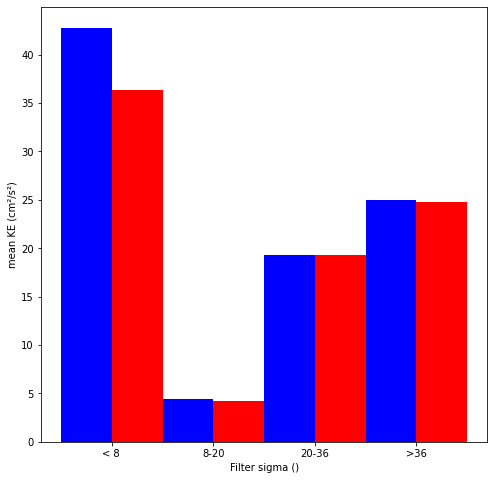

In [23]:
labels = ["< 8 ", "8-20", "20-36", ">36"]


fig=plt.figure(figsize=(8,8))
# ax = fig.add_axes([0,0,1,1])
X = np.arange(len(Means_AGRIF))
barWidth = 0.5
plt.bar(X-0.25,Means_AGRIF,width=barWidth,color='b')
plt.bar(X+0.25,Means_TWIN,width=barWidth,color='r')
plt.xticks([r for r in range(len(Means_AGRIF))],
        labels)
plt.xlabel("Filter sigma ()")
plt.ylabel("mean KE (cm²/s²)")

plt.savefig("KE_moyenne_pour_differents_filtres.png")

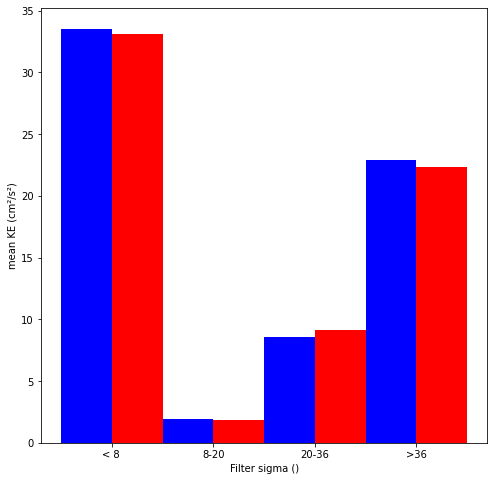

In [24]:
labels = ["< 8 ", "8-20", "20-36", ">36"]


fig=plt.figure(figsize=(8,8))
# ax = fig.add_axes([0,0,1,1])
X = np.arange(len(Means_AGRIF))
barWidth = 0.5
plt.bar(X-0.25,Means_AGRIF_plateau,width=barWidth,color='b')
plt.bar(X+0.25,Means_TWIN_plateau,width=barWidth,color='r')
plt.xticks([r for r in range(len(Means_AGRIF))],
        labels)
plt.xlabel("Filter sigma ()")
plt.ylabel("mean KE (cm²/s²)")
plt.savefig("KE_moyenne_pour_differents_filtres_plateauonly.png")

In [25]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkblue","blue","white","red","firebrick"])
darkred = plt.cm.Reds(np.linspace(0.99, 1, 2))
darkblue = plt.cm.YlGnBu(np.linspace(0.99, 1, 2))
bwr_cmap1 = cmap(np.linspace(0, 0.5, 252))
bwr_cmap2 = cmap(np.linspace(0.5, 1, 252))
w_cmap = cmap(np.linspace(0.5, 0.5, 78))
# bwr_cmap2 = plt.cm.(np.linspace(0.5, 1, 126))
# combine them and build a new colormap
colors = np.vstack((darkblue,bwr_cmap1,w_cmap,bwr_cmap2,darkred))
mymap =mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
<ipython-input-26-e196f626c1c7>:19: RuntimeWarning: Mean of empty slice
  im1 = plt.contourf(lon_zoom, lat_zoom ,np.nanmean(KE_TWIN_abv_36_zoom,axis=0), levels=np.linspace(0,200,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')


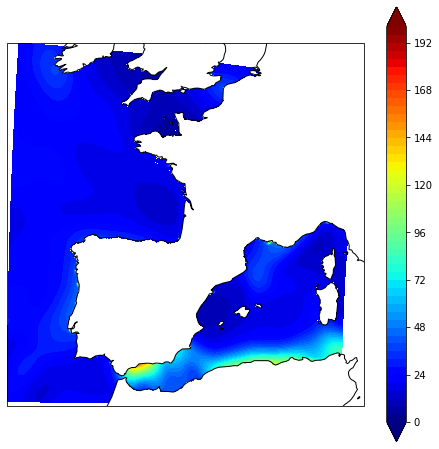

In [26]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon_zoom, lat_zoom ,np.nanmean(KE_TWIN_abv_36_zoom,axis=0), levels=np.linspace(0,200,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1)
# plt.close()

<ipython-input-31-d42f34fa93d4>:19: RuntimeWarning: Mean of empty slice
  im1 = plt.contourf(lon, lat,np.nanmean(KE_AGRIF,axis=0), levels=np.linspace(0,500,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')


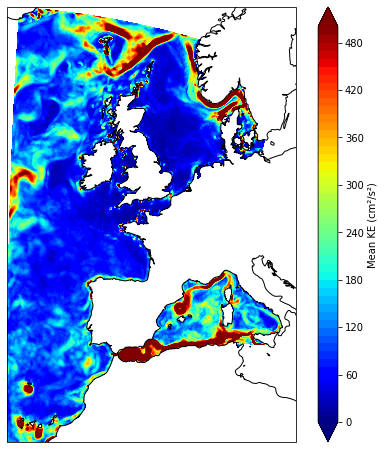

In [31]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon, lat,np.nanmean(KE_AGRIF,axis=0), levels=np.linspace(0,500,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1, label="Mean KE (cm²/s²)")
# plt.close()
plt.savefig('KE_AGRIF_zoom.png')

<ipython-input-32-45ab58628d6a>:19: RuntimeWarning: Mean of empty slice
  im1 = plt.contourf(lon, lat ,np.nanmean(KE_AGRIF - KE_TWIN,axis=0), levels=np.linspace(-70,70,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')


111.421425
102.215836


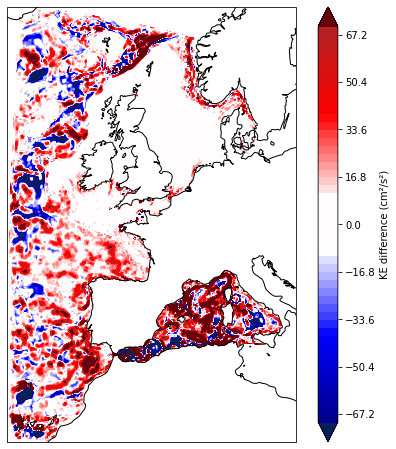

In [32]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon, lat ,np.nanmean(KE_AGRIF - KE_TWIN,axis=0), levels=np.linspace(-70,70,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label="KE difference (cm²/s²)")
print(np.nanmean(KE_AGRIF_36_zoom))
print(np.nanmean(KE_TWIN_36_zoom))
# plt.close()

plt.savefig('KE_difference_all.png')

<ipython-input-24-c94a16a47659>:19: RuntimeWarning: Mean of empty slice
  im1 = plt.contourf(lon_zoom, lat_zoom ,np.nanmean(KE_AGRIF_36_zoom - KE_TWIN_36_zoom,axis=0), levels=np.linspace(-50,50,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')


111.421425
102.215836


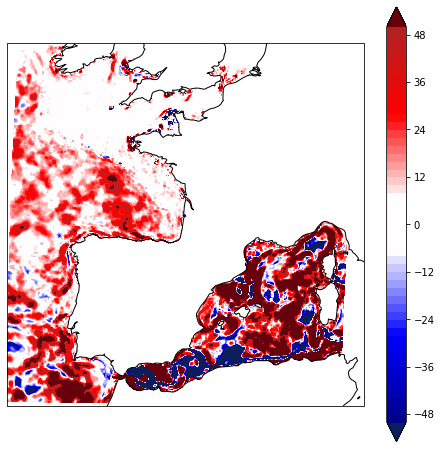

In [24]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon_zoom, lat_zoom ,np.nanmean(KE_AGRIF_36_zoom - KE_TWIN_36_zoom,axis=0), levels=np.linspace(-50,50,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1)
print(np.nanmean(KE_AGRIF_36_zoom))
print(np.nanmean(KE_TWIN_36_zoom))
# plt.close()
plt.savefig('KE_difference_bellow_36.png')

<ipython-input-177-f9c339b00c7d>:19: RuntimeWarning: Mean of empty slice
  im1 = plt.contourf(lon, lat ,np.nanmean(KE_AGRIF - KE_TWIN,axis=0), levels=np.linspace(-50,50,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')


111.421425
102.215836


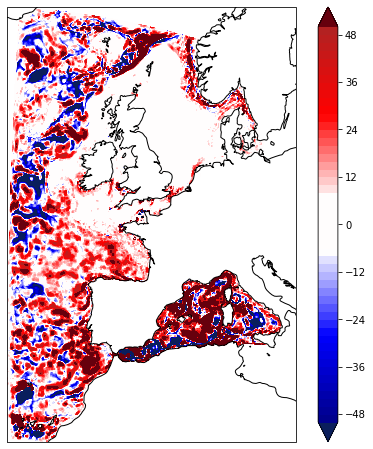

In [177]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon, lat ,np.nanmean(KE_AGRIF - KE_TWIN,axis=0), levels=np.linspace(-50,50,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1)
print(np.nanmean(KE_AGRIF_36_zoom))
print(np.nanmean(KE_TWIN_36_zoom))
# plt.close()
plt.savefig('KE_difference_bellow_20.png')

<ipython-input-27-26c405b9a346>:19: RuntimeWarning: Mean of empty slice
  im1 = plt.contourf(lon_zoom, lat_zoom ,np.nanmean(KE_AGRIF_12_36_zoom - KE_TWIN_12_36_zoom,axis=0), levels=np.linspace(-50,50,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')


111.421425
102.215836


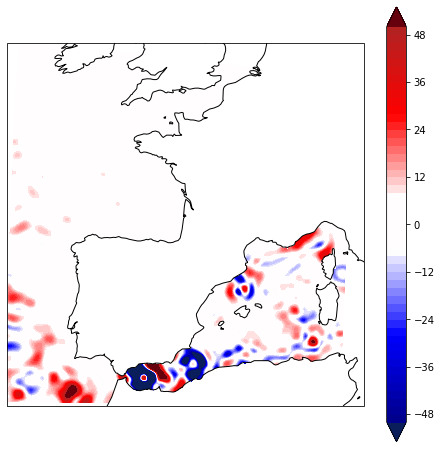

In [27]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon_zoom, lat_zoom ,np.nanmean(KE_AGRIF_20_36_zoom - KE_TWIN_20_36_zoom,axis=0), levels=np.linspace(-50,50,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1)
print(np.nanmean(KE_AGRIF_36_zoom))
print(np.nanmean(KE_TWIN_36_zoom))
# plt.close()
plt.savefig('KE_difference_20_36.png')

<ipython-input-81-d04e57723308>:19: RuntimeWarning: Mean of empty slice
  im1 = plt.contourf(lon_zoom, lat_zoom ,np.nanmean(KE_TWIN_above_12,axis=0), levels=np.linspace(0,200,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')


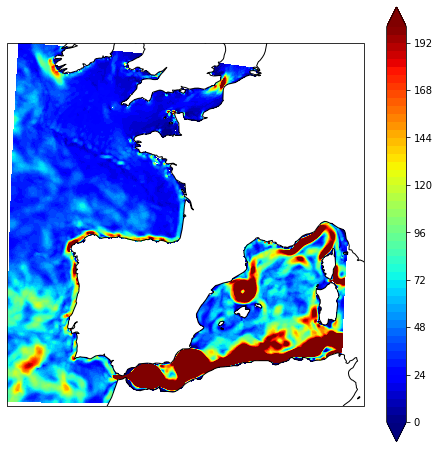

In [81]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon_zoom, lat_zoom ,np.nanmean(KE_TWIN_above_20_zoom,axis=0), levels=np.linspace(0,200,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1)
# plt.close()

<ipython-input-21-eb93ac9916cb>:19: RuntimeWarning: Mean of empty slice
  im1 = plt.contourf(lon_zoom, lat_zoom ,np.nanmean(KE_AGRIF_abv_36_zoom - KE_TWIN_abv_36_zoom,axis=0), levels=np.linspace(-10,10,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')


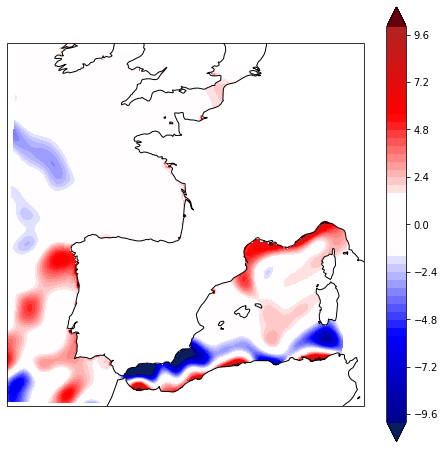

In [21]:
proj=ccrs.Mercator()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon_zoom, lat_zoom ,np.nanmean(KE_AGRIF_abv_36_zoom - KE_TWIN_abv_36_zoom,axis=0), levels=np.linspace(-10,10,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1)
# plt.close()

plt.savefig('KE_difference_for_scales_above_cutoff36.png')